<a href="https://colab.research.google.com/github/Souvik-kundu-off/SCT_ML_4/blob/main/HAND_GESTURE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install tensorflow keras

In [8]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/leapgestrecog


In [9]:
import os

dataset_path = "/kaggle/input/leapgestrecog"
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:
        print(f'{subindent}{f}')
    if len(files) > 5:
        print(f'{subindent}...')

leapgestrecog/
    leapGestRecog/
        07/
            02_l/
                frame_07_02_0067.png
                frame_07_02_0153.png
                frame_07_02_0105.png
                frame_07_02_0018.png
                frame_07_02_0050.png
                ...
            04_fist_moved/
                frame_07_04_0162.png
                frame_07_04_0164.png
                frame_07_04_0057.png
                frame_07_04_0189.png
                frame_07_04_0053.png
                ...
            09_c/
                frame_07_09_0131.png
                frame_07_09_0135.png
                frame_07_09_0178.png
                frame_07_09_0125.png
                frame_07_09_0019.png
                ...
            10_down/
                frame_07_10_0124.png
                frame_07_10_0006.png
                frame_07_10_0005.png
                frame_07_10_0199.png
                frame_07_10_0073.png
                ...
            06_index/
                frame_07_06_

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = "/kaggle/input/leapgestrecog/leapGestRecog"
image_size = (128, 128)
images = []
labels = []
label_map = {
    '01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3,
    '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7,
    '09_c': 8, '10_down': 9
}
for subject_folder in os.listdir(dataset_path):
    subject_path = os.path.join(dataset_path, subject_folder)
    if os.path.isdir(subject_path):
        for gesture_folder in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture_folder)
            if os.path.isdir(gesture_path):
                label = label_map[gesture_folder]
                for image_file in os.listdir(gesture_path):
                    image_path = os.path.join(gesture_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, image_size)
                        images.append(image)
                        labels.append(label)
images = np.array(images)
labels = np.array(labels)
print(f"Loaded {len(images)} images with labels.")

Loaded 20000 images with labels.


In [11]:
images = np.expand_dims(images, axis=-1)
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")

Training data shape: (16000, 128, 128, 1)
Validation data shape: (4000, 128, 128, 1)
Training labels shape: (16000,)
Validation labels shape: (4000,)


In [12]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,354 (12.61 MB)

 Trainable params: 3,305,354 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8112 - loss: 0.5720 - val_accuracy: 0.9998 - val_loss: 0.0023
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9966 - loss: 0.0111 - val_accuracy: 0.9983 - val_loss: 0.0083
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9998 - loss: 9.3997e-04 - val_accuracy: 1.0000 - val_loss: 4.8518e-04
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 1.0000 - loss: 2.2089e-05 - val_accuracy: 1.0000 - val_loss: 5.3001e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 1.0000 - loss: 1.1108e-05 - val_accuracy: 1.0000 - val_loss: 4.6690e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 1.0000 - loss: 6.5998e-06 - val_accuracy: 1.0000 - val_loss: 4.4559e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 1.0000 - loss: 4.1781e-06 - val_accuracy: 1.0000 - val_loss: 4.2343e-04
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/ste

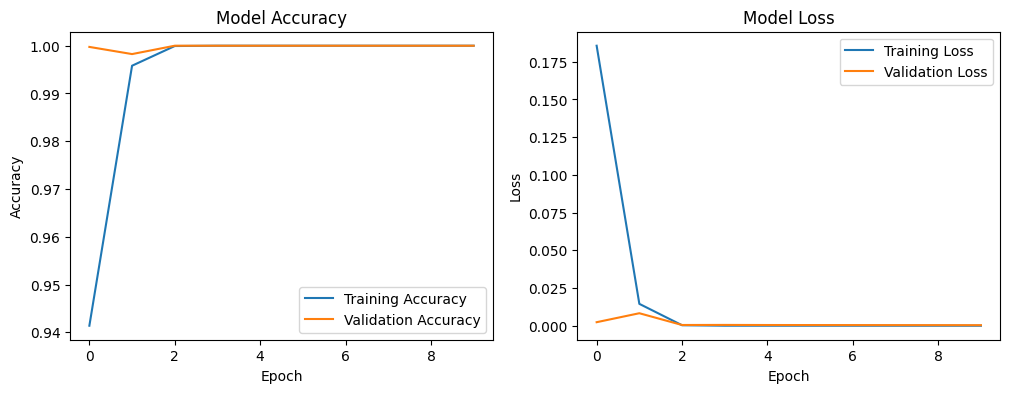

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
loss, accuracy = model.evaluate(x_val, y_val, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0004
Test Accuracy: 1.0000


In [16]:
import cv2
import numpy as np
from tensorflow import keras

def predict_gesture(image_path, model, image_size=(128, 128), label_map=label_map):

    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return "Error: Could not load image."

        img = cv2.resize(img, image_size)
        img = np.expand_dims(img, axis=-1)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0

        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)

        reverse_label_map = {v: k for k, v in label_map.items()}
        predicted_gesture = reverse_label_map[predicted_class]

        return predicted_gesture

    except Exception as e:
        return f"An error occurred during prediction: {e}"

In [ ]:
import gradio as gr
import cv2
import numpy as np
from tensorflow import keras

reverse_label_map = {v: k for k, v in label_map.items()}

def predict_gesture_gradio(image):

    if image is None:
        return "No image provided."
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(image, image_size)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32') / 255.0
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_gesture = reverse_label_map[predicted_class]
    return predicted_gesture

iface = gr.Interface(
    fn=predict_gesture_gradio,
    inputs=gr.Image(type="numpy"),
    outputs="text",
    title="Hand Gesture Recognition",
    description="Upload an image of a hand gesture to get a prediction."
)
iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a1b262e3750e7010fe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
